MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x10d9058a0> (for post_execute), with arguments args (),kwargs {}:


ValueError: 'aspect' must be 1D with shape (3,), but your input has shape (3, 2)

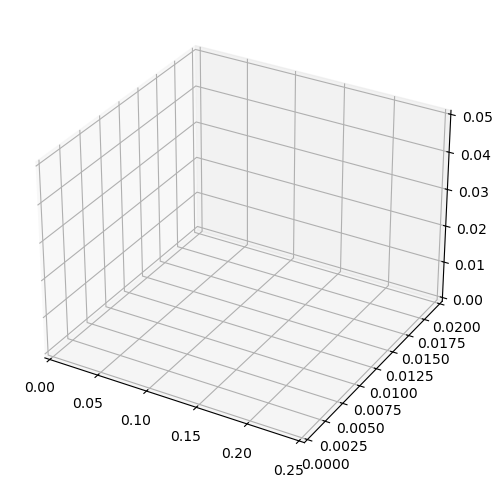

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os

# Path to the folder containing your PNG images
image_folder = '.'

images = [img for img in os.listdir(image_folder) if img.startswith("p_")]

images.sort()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(projection='3d')

def animate(i):
    ax.clear()
    p = np.loadtxt(images[i], skiprows=1)
    # ax.set_xlim([0., 0.25])
    # ax.set_ylim([0., 0.02])
    # ax.set_zlim([0., 0.05])
    ax.set_box_aspect(([0., 0.25], [0., 0.02], [0., 0.05]))
    quant = np.linalg.norm(p[:, 3:6], axis=1)
    # quant = p[:, 7]
    # quant = p[:, 5]
    points = ax.scatter(p[:, 0], p[:, 1], p[:, 2], 5, quant)
    # ax.colorbar(location="bottom")
    return points

ani = FuncAnimation(fig, animate, frames=19)
ani.save("output.gif")